In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans_mutation_df = pd.read_csv('data/transmutation_df.csv')
delta_correlation_df = pd.read_csv('data/delta_correlation_df_with_significance.csv')

In [3]:
delta_correlation_df

,Gene,Delta_Correlation,P_Value,FDR,Cancer,Significant
0,A1BG,-0.198013,2.451044e-01,4.045115e-01,HNSCC,False
1,A2M,-0.118384,4.480278e-01,6.091130e-01,HNSCC,False
2,A2ML1,-0.023469,2.918125e-01,4.561968e-01,HNSCC,False
3,AAAS,0.275905,1.051756e-01,2.209072e-01,HNSCC,False
4,AACS,-0.136836,1.800586e-01,3.266475e-01,HNSCC,False
...,...,...,...,...,...,...
50684,ZWINT,1.219024,2.267627e-09,1.049863e-07,Endometrial,True
50685,ZXDC,-0.346532,2.983295e-01,5.386144e-01,Endometrial,False
50686,ZYG11B,0.768196,5.463938e-04,5.319699e-03,Endometrial,True
50687,ZYX,0.253630,2.456049e-01,4.795301e-01,Endometrial,False


In [4]:
delta_correlation_df = delta_correlation_df[delta_correlation_df.FDR < 0.05]
delta_correlation_df = delta_correlation_df[['Gene', 'Cancer', 'Delta_Correlation']]
trans_mutation_df = trans_mutation_df.drop(columns = 'Delta_Correlation')
trans_df = pd.merge(trans_mutation_df, delta_correlation_df, how = 'inner')
trans_df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
0,A1CF,0.166994,0.927123,CCRCC,PBRM1,0.140908
1,A1CF,0.904104,0.993714,CCRCC,SETD2,0.140908
2,AADAT,0.583528,0.967151,CCRCC,PBRM1,-0.340907
3,AAGAB,0.210859,0.927123,CCRCC,PBRM1,0.432618
4,AAGAB,0.601195,0.967151,CCRCC,SETD2,0.432618
...,...,...,...,...,...,...
162316,RAB40C,0.098399,0.862486,LUAD,TP53,0.418644
162317,RAB40C,0.085245,0.856123,LUAD,TTN,0.418644
162318,SCML2,0.168875,0.890597,LUAD,TP53,0.419318
162319,TNS4,0.559251,0.960600,LUAD,TP53,0.924186


In [5]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

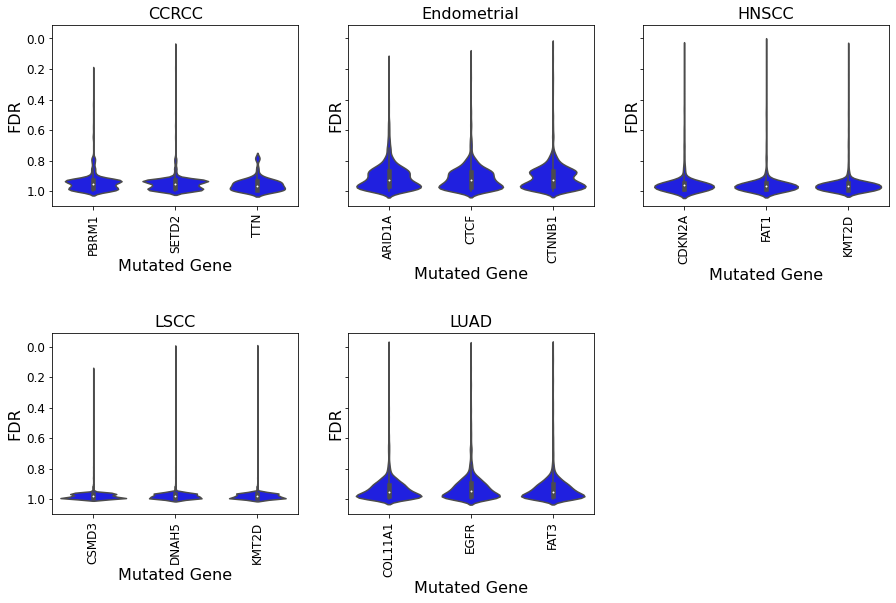

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))

fig.delaxes(axes[1,2])
cancers = list(pd.unique(trans_df.Cancer))
for axe in axes.flatten():
    last = False
    if len(cancers) == 1:
        last = True
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    alist = list(df.Mutated_Gene.unique()[:3])
    df = df[df['Mutated_Gene'].isin(alist)]
    sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR', ax=axe, color="blue")
    axe.set_title(cancer)
    axe.tick_params(axis='x', rotation=90)
    axe.set_xlabel('Mutated Gene')
    axe.invert_yaxis()
    
plt.subplots_adjust(hspace=.7)
plt.savefig('Figures/Figure 4) Transmutation Effects',dpi = 600, bbox_inches='tight')